Análisis bajo riesgo
===

* 60:00 min | Última modificación: Juno 22, 2019 | YouTube

A continuación se desarrolla el mismo caso anterior pero considerando que el precio y la producción son variables aleatorias.

In [1]:
import numpy as np
import numpy.random as rdn
import cashflows as cf

In [2]:
## se construye una función que recibe la información relevante y retorn el npv

def project(marr,
            costo,
            inversion):
    
    
    precio      = rdn.triangular(  8,  10,  12, 10)
    produccion  = rdn.triangular( 80, 100, 120, 10)

    
    ingre = cf.cashflow(const_value = [0] + (precio*produccion).tolist(), start=2018)  
    opera = cf.cashflow(const_value = [0] + [costo] * 10, start=2018)
    inver = cf.cashflow(const_value = [inversion] + [0] * 10, start=2018)
    
    asset = cf.cashflow(const_value=[inversion] + [0] * 10, start=2018)
    life  = cf.cashflow(const_value=[5] + [0]*10, start=2018)
    
    dep   = cf.depreciation_sl(costs = asset, life=life)['Depr']
    
    antes = ingre - opera - inver - dep
    desp  = cf.after_tax_cashflow(antes, cf.interest_rate([30] * 11, start=2018))
    neto  = antes + dep
    
    npv   = cf.timevalue(cflo=neto, prate=marr)
    
    return npv

In [3]:
marr = cf.interest_rate([10] * 11, start=2018)
project(marr, 220, 2000)

2622.27516893243

In [4]:
import matplotlib.pyplot as plt

In [5]:
result = []

for sim in range(1000):
    result.append(project(marr, 220, 2000))
result[1:10]

[2597.27970768053,
 2610.1513068181644,
 3052.5482478377694,
 2552.1355200855833,
 2742.8843000115448,
 2474.7929391657253,
 2749.3260743851033,
 3235.9889184226331,
 2462.5773726707012]

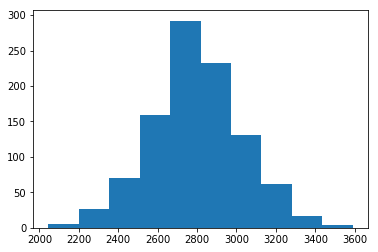

In [6]:
plt.hist(result)
plt.show()

**Ejercicio.--** Incluya en la simulación a las variables costo e inversión.